In [2]:
import numpy as np
import pandas as pd
import sys
sys.path.append("../")
import matplotlib.pyplot as plt
import Thermobar as pt
pd.options.display.max_columns = None
import inspect
from functools import partial
import warnings as w
w.filterwarnings("ignore", message="rubicon.objc.ctypes_patch has only been tested ")
w.filterwarnings("ignore", message="The handle")

In [10]:
out=pt.import_Excel('Tenerife.xlsx', sheet_name="Thermobar_input")
# This extracts a dataframe of all inputs
my_input=out['my_input']
# This extracts a dataframe of kspar compositions from the dictionary "out"
Cpxs=out['Cpxs']
# This extracts a dataframe of plag compositions from the dictionary "out"
Liqs=out['Liqs']

We have set Fe3Fet_Liq to zero, as you only entered FeOt. You can input a Fe3FeT_Liq column to specify this value instead


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
PT=pt.calculate_Cpx_Liq_PT_Iter(Liq_Comps=Liqs, Cpx_Comps=Cpxs, equationT="T_Mas2013_Talk2012", equationP="P_Mas2013_Palk2012")

..\Thermobar\clinopyroxene_thermobarometry.py:513: UserWarning: Youve selected a P-independent function, so your P input doesnt do anything
  w.warn('Youve selected a P-independent function, so your P input doesnt do anything')
..\Thermobar\clinopyroxene_thermobarometry.py:354: UserWarning: Youve selected a T-independent function, so your T input doesnt do anything
  w.warn('Youve selected a T-independent function, so your T input doesnt do anything')
..\Thermobar\clinopyroxene_thermobarometry.py:399: UserWarning: Youve selected a T-independent function, so your T input doesnt do anything
  w.warn('Youve selected a T-independent function, so your T input doesnt do anything')


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


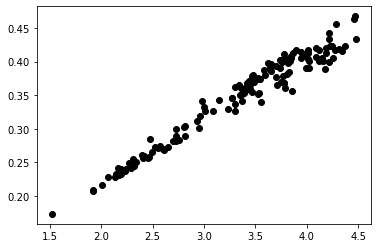

In [11]:
plt.plot(PT['P_kbar_calc'], my_input['Pressure'], 'ok')

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


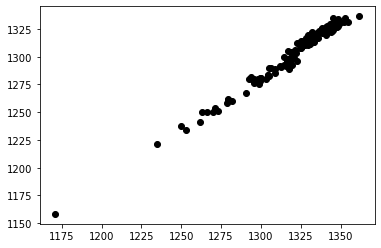

In [12]:
plt.plot(PT['T_K_calc'], my_input['Temperature'], 'ok')

In [15]:
PT['P_kbar_calc']/(10*my_input['Pressure'])

0      0.923178
1      0.969420
2      0.939929
3      0.941838
4      0.939515
         ...   
138    0.932952
139    0.957587
140    0.934249
141    0.919678
142    0.915377
Length: 143, dtype: float64

In [16]:
PT['T_K_calc']/my_input['Temperature']

0      1.011833
1      1.016001
2      1.016322
3      1.015563
4      1.015625
         ...   
138    1.010587
139    1.010740
140    1.010946
141    1.013801
142    1.014065
Length: 143, dtype: float64

In [19]:
test_out=pt.calculate_Cpx_Eq_Tests(Liq_Comps=Liqs, Cpx_Comps=Cpxs,
                           Fe3FeT_Liq=0, P=10*my_input['Pressure'], T=my_input['Temperature'], sigma=1)


C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
test_out

C:\Users\penny\anaconda3\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,P_kbar_calc,T_K_calc,Eq Tests Neave2017?,Delta_Kd_Put2008,Delta_Kd_Mas2013,Delta_EnFs,Delta_CaTs,Delta_DiHd,SiO2_Liq,TiO2_Liq,Al2O3_Liq,FeOt_Liq,MnO_Liq,MgO_Liq,CaO_Liq,Na2O_Liq,K2O_Liq,Cr2O3_Liq,P2O5_Liq,H2O_Liq,Fe3FeT_Liq,NiO_Liq,CoO_Liq,CO2_Liq,Sample_ID_Liq,SiO2_Liq_mol_frac,MgO_Liq_mol_frac,MnO_Liq_mol_frac,FeOt_Liq_mol_frac,CaO_Liq_mol_frac,Al2O3_Liq_mol_frac,Na2O_Liq_mol_frac,K2O_Liq_mol_frac,TiO2_Liq_mol_frac,P2O5_Liq_mol_frac,Cr2O3_Liq_mol_frac,SiO2_Liq_cat_frac,MgO_Liq_cat_frac,MnO_Liq_cat_frac,FeOt_Liq_cat_frac,CaO_Liq_cat_frac,Al2O3_Liq_cat_frac,Na2O_Liq_cat_frac,K2O_Liq_cat_frac,TiO2_Liq_cat_frac,P2O5_Liq_cat_frac,Cr2O3_Liq_cat_frac,FeO_Liq_cat_frac,Mg_Number_Liq_NoFe3,Mg_Number_Liq_Fe3,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx,SiO2_Cpx_cat_6ox,MgO_Cpx_cat_6ox,FeOt_Cpx_cat_6ox,CaO_Cpx_cat_6ox,Al2O3_Cpx_cat_6ox,Na2O_Cpx_cat_6ox,K2O_Cpx_cat_6ox,MnO_Cpx_cat_6ox,TiO2_Cpx_cat_6ox,Cr2O3_Cpx_cat_6ox,oxy_renorm_factor,Al_IV_cat_6ox,Al_VI_cat_6ox,Cation_Sum_Cpx,CrCaTs,a_cpx_En,Mgno_CPX,Jd,CaTs,CaTi,DiHd_1996,EnFs,DiHd_2003,Di_Cpx,Kd_Fe_Mg,Kd_Fe_Mg_NoFe3,lnK_Jd_liq,lnK_Jd_DiHd_liq_1996,lnK_Jd_DiHd_liq_2003,Kd_Fe_Mg_IdealWB,DeltaFeMg_WB,Kd_Ideal_Put,Kd_Ideal_Masotta,DiHd_Pred_Mollo,EnFs_Pred_Mollo,CaTs_Pred_P1999,CrCaTS_Pred_P1999
0,2.322305,1289.690766,N,0.067874,0.013442,0.006520,0.005657,0.053888,55.793045,1.594826,19.062002,5.408196,0.189362,1.644348,4.477297,6.699145,3.674683,0,0.465332,0.0,0,0.0,0.0,0.0,0,0.625534,0.027484,0.001798,0.050708,0.053785,0.125941,0.072813,0.026280,0.013450,0.002209,0.0,0.509707,0.022395,0.001465,0.041319,0.043826,0.205242,0.118661,0.042827,0.010959,0.003599,0.0,0.041319,0.351481,0.351481,51.9816,0.9467,2.0654,7.7240,0.7189,13.8894,21.6528,0.9272,0.0,0.0044,0,1.938202,0.772043,0.240851,0.865041,0.090763,0.067030,0.0,0.022704,0.026552,0.000130,0.0,0.061798,0.028965,4.023315,0.000065,0.062565,0.762209,0.028965,0.000000,0.030899,0.834077,0.089408,0.834077,0.621808,0.169083,0.169083,1.521233,-5.526067,-5.526067,0.250771,0.081688,0.236957,0.155641,0.780189,0.082888,0.005657,0.0
1,2.727627,1295.283146,N,0.060963,0.020335,0.003066,0.005993,0.058073,54.365467,1.839438,18.824080,6.077858,0.193747,2.001303,5.066410,6.466870,3.532315,0,0.558027,0.0,0,0.0,0.0,0.0,1,0.609074,0.033425,0.001839,0.056945,0.060816,0.124276,0.070236,0.025243,0.015501,0.002646,0.0,0.498260,0.027344,0.001504,0.046584,0.049752,0.203331,0.114914,0.041300,0.012681,0.004330,0.0,0.046584,0.369860,0.369860,51.9136,1.0126,2.2267,7.4556,0.5493,13.8416,21.7182,0.8661,0.0,0.0032,1,1.937854,0.770255,0.232744,0.868634,0.097962,0.062684,0.0,0.017367,0.028432,0.000094,0.0,0.062146,0.035816,4.016027,0.000047,0.063162,0.767946,0.035816,0.000000,0.031073,0.837514,0.082743,0.837514,0.632223,0.177361,0.177361,1.820401,-5.000927,-5.000927,0.251838,0.074477,0.238324,0.157026,0.779441,0.079677,0.005993,0.0
2,2.711931,1258.392005,N,0.056488,0.024050,0.002178,0.005381,0.029125,56.854234,1.350199,19.431942,4.944379,0.190073,1.276892,4.033954,6.663573,3.805848,0,0.335119,0.0,0,0.0,0.0,0.0,2,0.639733,0.021419,0.001812,0.046527,0.048634,0.128848,0.072688,0.027316,0.011428,0.001596,0.0,0.519919,0.017407,0.001472,0.037813,0.039525,0.209433,0.118148,0.044400,0.009288,0.002595,0.0,0.037813,0.315229,0.315229,51.1635,1.0659,2.6896,8.6341,0.6300,12.9081,21.5212,1.0228,0.0,0.0088,2,1.921713,0.722768,0.271207,0.866100,0.119062,0.074485,0.0,0.020043,0.030114,0.000261,0.0,0.078287,0.040775,4.025753,0.000131,0.053658,0.727142,0.040775,0.000000,0.039143,0.826826,0.083575,0.826826,0.589342,0.172742,0.172742,1.807645,-5.437594,-5.437594,0.244248,0.071507,0.229230,0.148691,0.797700,0.081397,0.005381,0.0
3,2.454377,1296.825054,N,0.068218,0.012545,0.004110,0.005905,0.056260,55.024260,1.725304,18.919712,5.710022,0.189489,1.893824,4.770762,6.577824,3.626054,0,0.522280,0.0,0,0.0,0.0,0.0,3,0.616501,0.031632,0.001798,0.053502,0.057272,0.124917,0.071446,0.025914,0.014540,0.002477,0.0,0.503367,0.025827,0.001468,0.043684